<a href="https://colab.research.google.com/github/KatherinneOlaya/Neural-Network-Titanic/blob/main/Redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hola Mundo")

Hola Mundo


# 1. Definir el problema:
| Atributo      | Tipo       | Descripción                                                                    |
| ------------- | ---------- | ------------------------------------------------------------------------------ |
| `survived`    | Binario    | **0 = No sobrevivió**, **1 = Sí sobrevivió** (etiqueta objetivo 🎯)            |
| `pclass`      | Categórico | Clase del boleto: **1 = 1ra clase**, **2 = 2da**, **3 = 3ra**                  |
| `sex`         | Categórico | Sexo biológico: `male` o `female`                                              |
| `age`         | Numérico   | Edad del pasajero (puede tener valores nulos)                                  |
| `sibsp`       | Numérico   | Nº de **hermanos/esposos** a bordo                                             |
| `parch`       | Numérico   | Nº de **padres/hijos** a bordo                                                 |
| `fare`        | Numérico   | Tarifa del pasaje (valor pagado por el boleto)                                 |
| `embarked`    | Categórico | Puerto de embarque: **C** (Cherbourg), **Q** (Queenstown), **S** (Southampton) |
| `class`       | Categórico | Versión textual de `pclass`: 'First', 'Second', 'Third'                        |
| `who`         | Categórico | Clasificación como `man`, `woman`, o `child` según edad y sexo                 |
| `adult_male`  | Booleano   | `True` si el pasajero es un **hombre adulto**, `False` si no                   |
| `deck`        | Categórico | Letra de la **cubierta** donde estaba su cabina (A–G, muchos `NaN`)            |
| `embark_town` | Categórico | Ciudad desde la que embarcó: 'Cherbourg', 'Queenstown' o 'Southampton'         |
| `alive`       | Categórico | Versión textual de `survived`: `'yes'` o `'no'`                                |
| `alone`       | Booleano   | `True` si no tenía familiares a bordo (`sibsp + parch == 0`)                   |



In [ ]:
pip install scikeras

In [ ]:
import seaborn as sns # Datasets y visualizaciones
import numpy as np # Matematicas
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

from itertools import combinations
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from scikeras.wrappers import KerasClassifier

import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [ ]:
dt = sns.load_dataset('titanic')
dt.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
dt.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


<Axes: >

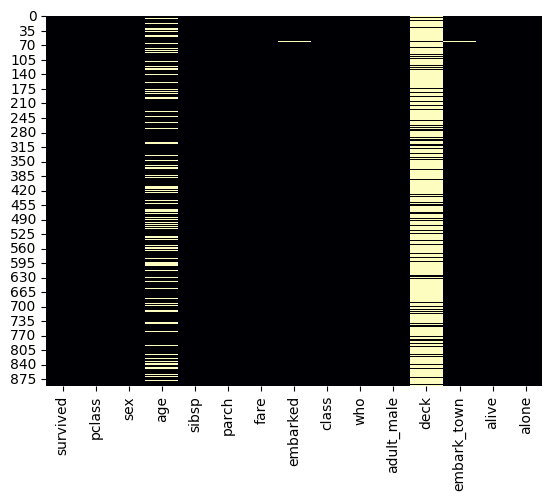

In [ ]:
sns.heatmap(dt.isnull(), cmap = 'magma', cbar = False
            )

In [ ]:
df = pd.DataFrame(data = dt.dtypes, columns = ['info'])
type_cols = {}

for types in df['info']:
  if types not in type_cols:
    type_cols[types] = 1
  else:
    type_cols[types] += 1



print(type_cols)

{dtype('int64'): 4, dtype('O'): 5, dtype('float64'): 2, CategoricalDtype(categories=['First', 'Second', 'Third'], ordered=False, categories_dtype=object): 1, dtype('bool'): 2, CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=False, categories_dtype=object): 1}


In [ ]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#  Data Description:

_841_ registers with _15_ attributes in our data
- *6 numerical values and 9 categorical values*
- Our numerical data is with different scales
1. **Age**: Have 177 registers nulls
2. **Embarked**: Have 2 registers nulls
3. **Deck**: Have 688 registers nulls
4. **Embark Town**: Have 2 registers nulls

# EDA: Data Analysis Exploration

In [ ]:
dt.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


In [ ]:
# Run just once

new = {'adult_male': 'adult'}
dt.rename(columns = new, inplace = True)

In [ ]:
# Run just once
dt['adult'] = dt['adult'].replace({True: 'Male', False: 'Female'})
dt['adult'].value_counts()



,count
adult,
Male,537
Female,354


In [ ]:
# Data numerical

numerical_data = dt.select_dtypes(include = np.number)
numerical_data.columns
#print(type(numerical_data))

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [ ]:
# Data categorica

categ_data = dt.select_dtypes(exclude = np.number)
categ_data.columns

Index(['sex', 'embarked', 'class', 'who', 'adult', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## Univariate Analysis


 survived 



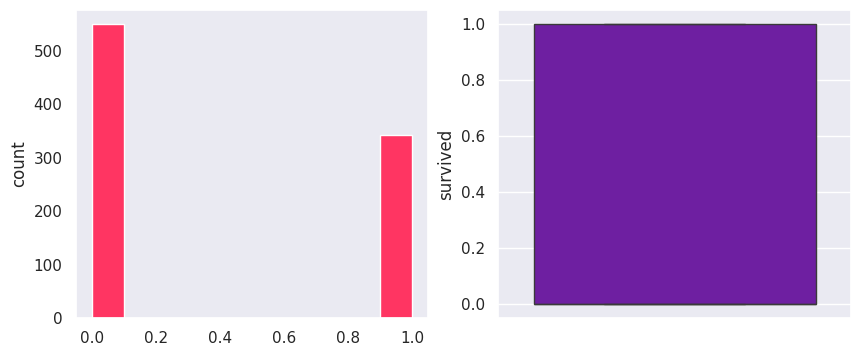


 pclass 



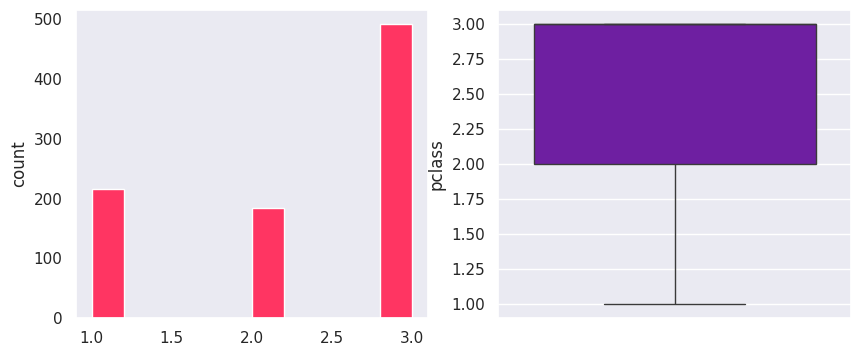


 age 



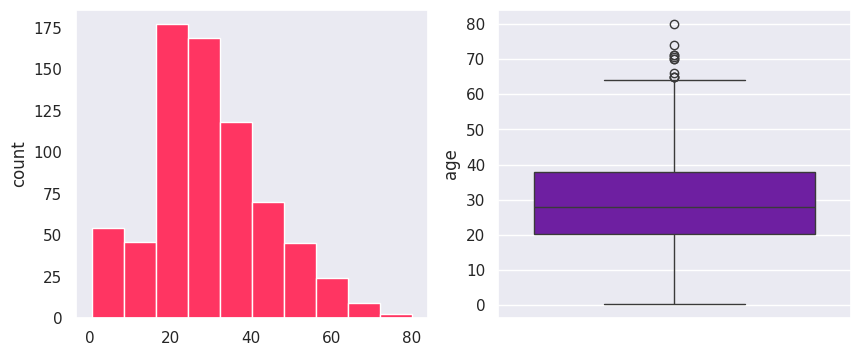


 sibsp 



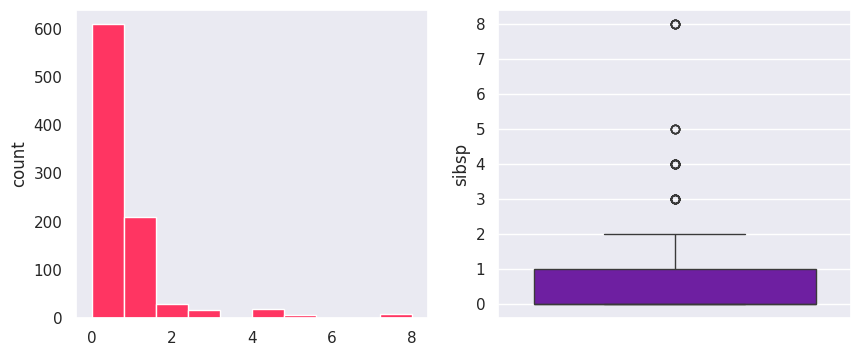


 parch 



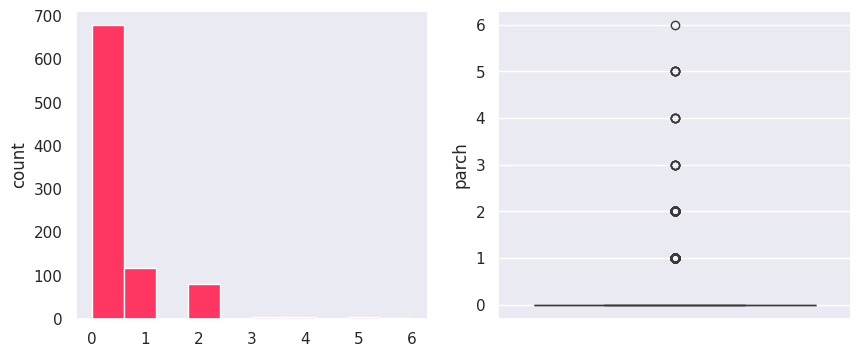


 fare 



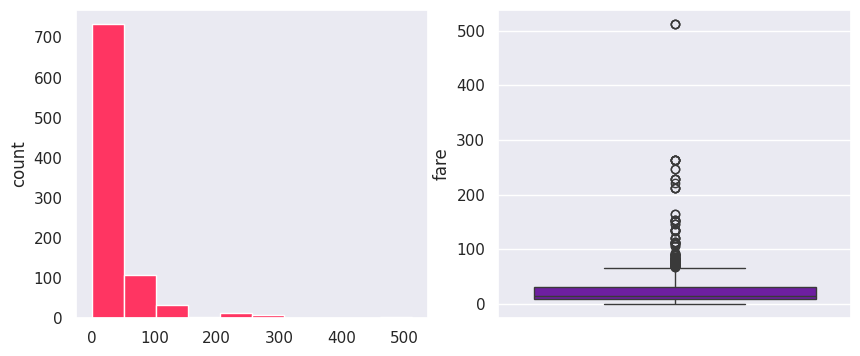

In [ ]:
for i in numerical_data:
  sns.set(style = 'darkgrid')
  print('\n', i, '\n')
  plt.figure(figsize = (10,4))
  plt.subplot(1,2,1)
  numerical_data[i].hist(bins = 10, grid = False, color = '#ff3562')
  plt.ylabel('count')
  plt.subplot(1,2,2)
  sns.boxplot(numerical_data[i], color = '#7209b7')
  plt.show()


 survived 



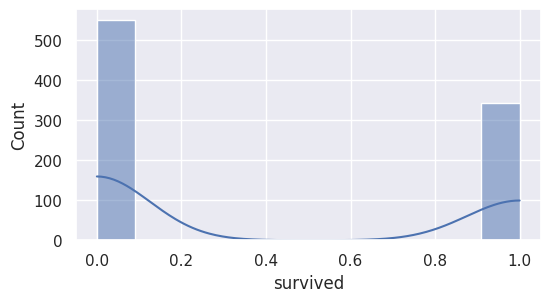


 pclass 



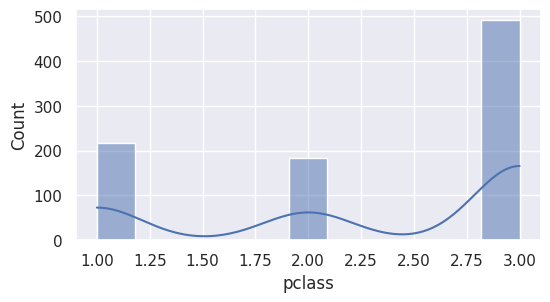


 age 



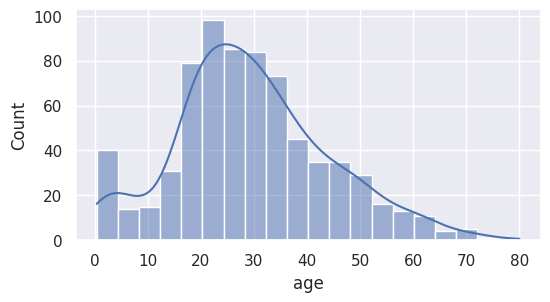


 sibsp 



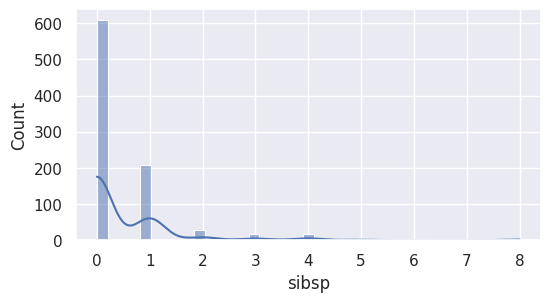


 parch 



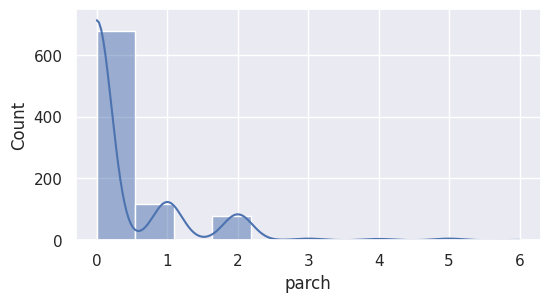


 fare 



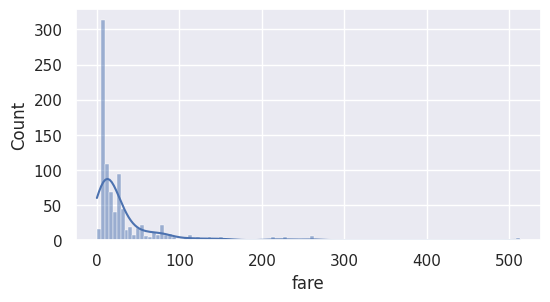

In [ ]:
for i in numerical_data.columns:
  sns.set(style = 'darkgrid')
  print('\n', i, '\n')
  plt.figure(figsize = (6,3))
  plt.subplot(1,1,1)
  sns.histplot(data = numerical_data, x = i, kde = True)
  plt.show()

### Categoricas

In [ ]:
categ_data.nunique()

,0
sex,2
embarked,3
class,3
who,3
adult,2
deck,7
embark_town,3
alive,2
alone,2


In [ ]:
print("Las variables categoricas son :\n")
categ_data.columns.tolist()

Las variables categoricas son :



['sex',
 'embarked',
 'class',
 'who',
 'adult',
 'deck',
 'embark_town',
 'alive',
 'alone']


 sex 



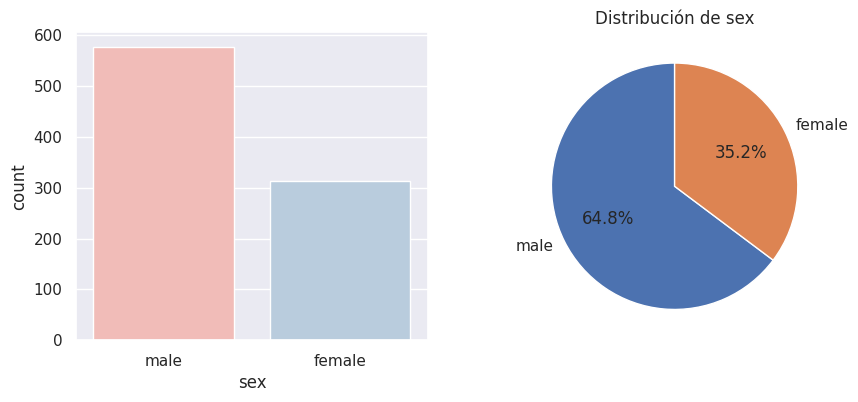


 embarked 



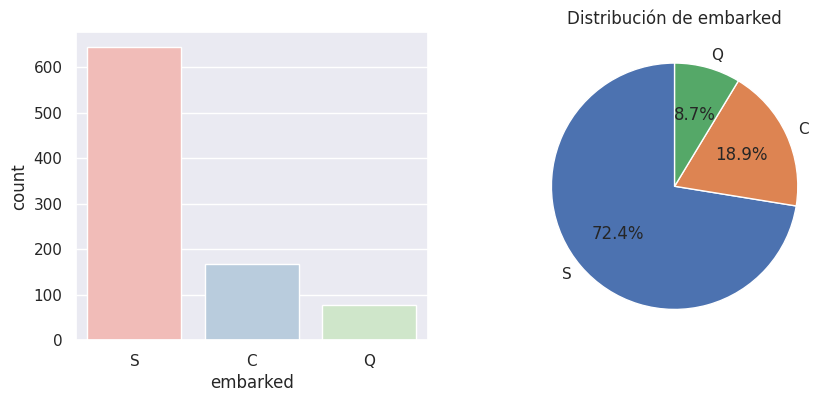


 class 



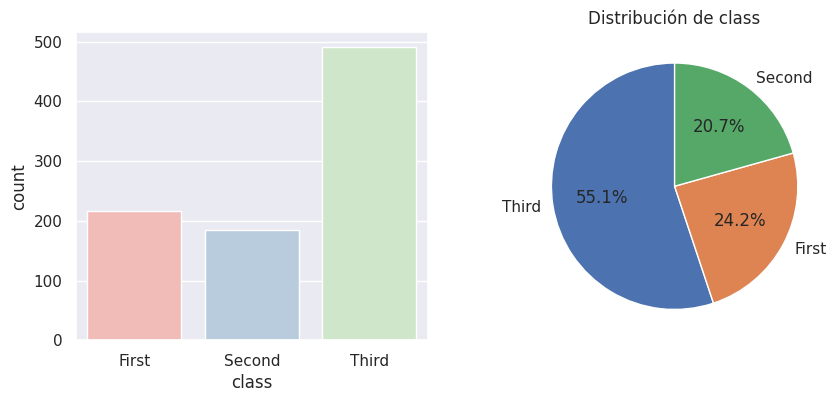


 who 



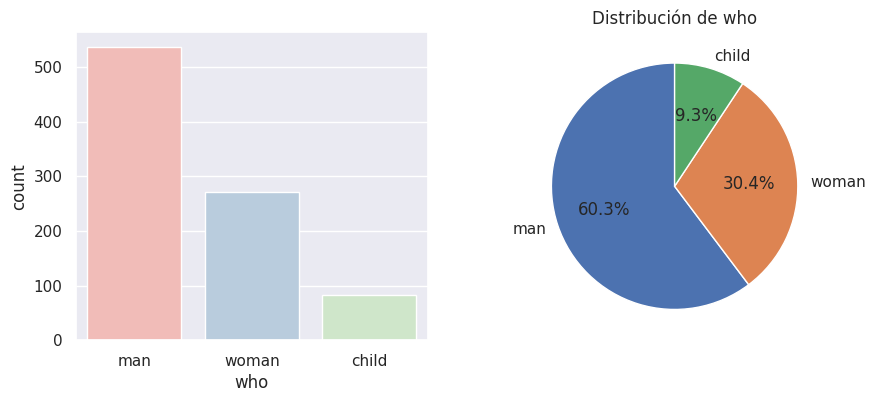


 adult 



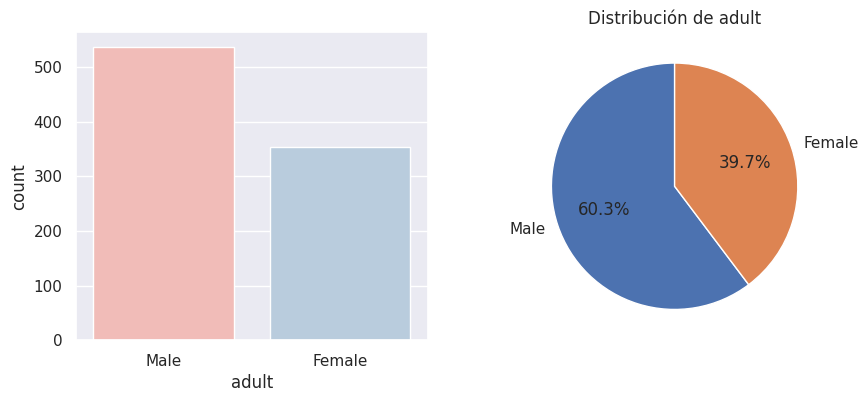


 deck 



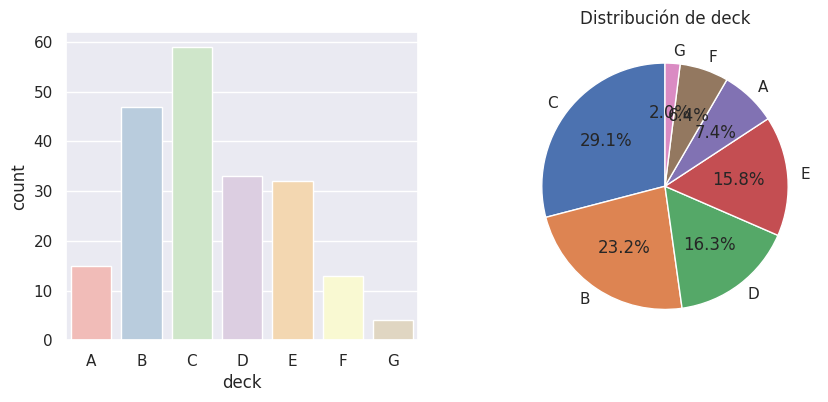


 embark_town 



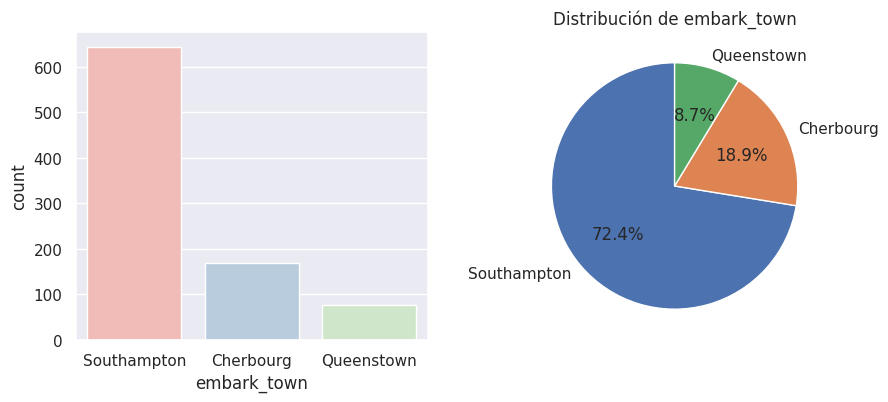


 alive 



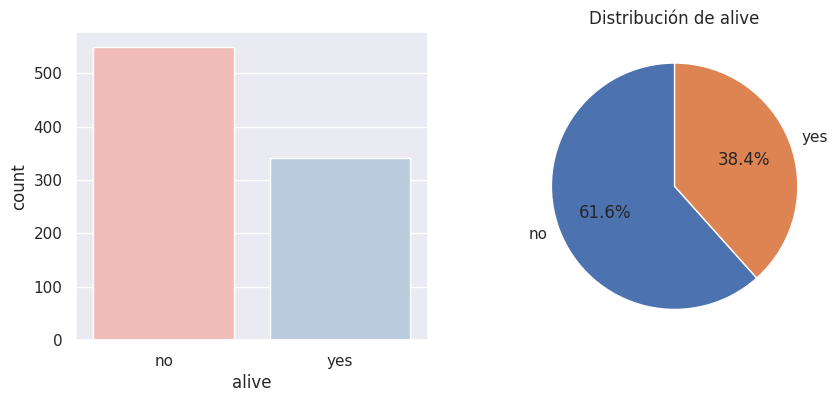


 alone 



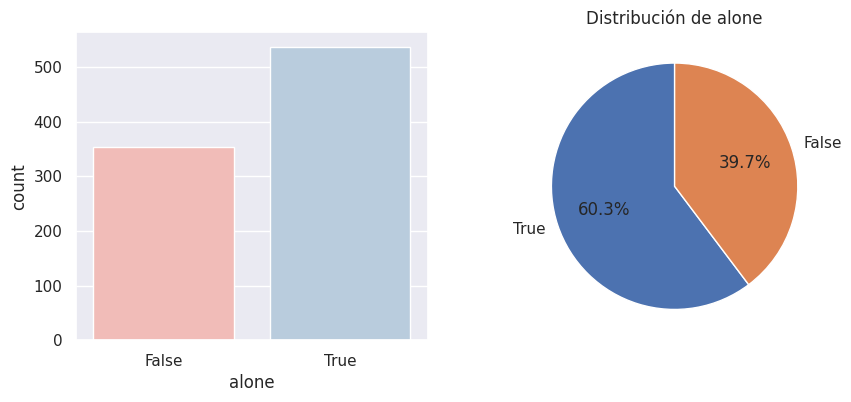

In [ ]:
for i in categ_data.columns:
  sns.set(style = 'darkgrid')
  print('\n', i, '\n')
  plt.figure(figsize = (10,4))
  plt.subplot(1,2,1)
  sns.countplot(x = i, data = categ_data, hue=i,  palette = "Pastel1", legend=False ); # <- Modificado
  counts = categ_data[i].value_counts()

  plt.subplot(1,2,2)
  plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Distribución de {i}')


  plt.show()

## Bivariate Analysis

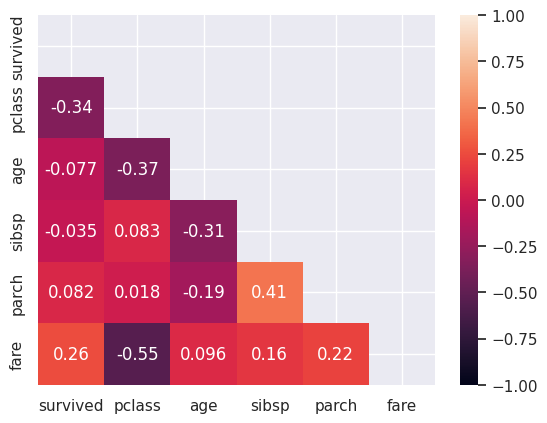

In [ ]:
mask  = np.triu(np.ones_like(numerical_data.corr()))
sns.heatmap(numerical_data.corr(), annot = True, mask = mask, vmin =-1, vmax = 1);

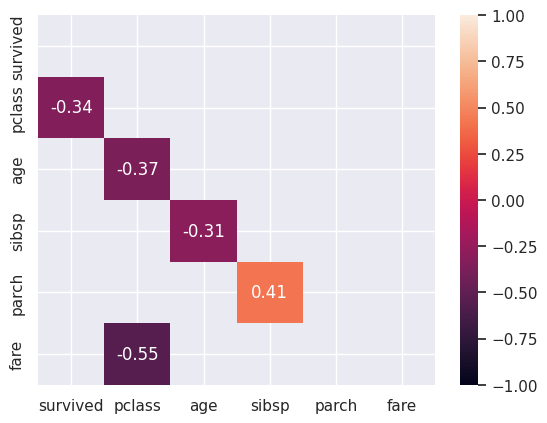

In [ ]:
mask_umbra = (numerical_data.corr().abs() <0.3)
mask_f = mask | mask_umbra

sns.heatmap(numerical_data.corr(), annot = True, mask = mask_f, vmin =-1, vmax = 1);

In [ ]:
print((numerical_data.corr() > 0.3) | (numerical_data.corr() < -0.3))

          survived  pclass    age  sibsp  parch   fare
survived      True    True  False  False  False  False
pclass        True    True   True  False  False   True
age          False    True   True   True  False  False
sibsp        False   False   True   True   True  False
parch        False   False  False   True   True  False
fare         False    True  False  False  False   True


In [ ]:

umbral = 0.3
pares_correlacionados = []


for col1, col2 in combinations(numerical_data.corr().columns, 2):
    corr = numerical_data.corr().loc[col1, col2]
    if abs(corr) > umbral:
        pares_correlacionados.append((col1, col2, round(corr, 2)))


print("Relations:")
for par in pares_correlacionados:
    print(par)

Relations:
('survived', 'pclass', -0.34)
('pclass', 'age', -0.37)
('pclass', 'fare', -0.55)
('age', 'sibsp', -0.31)
('sibsp', 'parch', 0.41)


### Observations📢:
1. Negatives correlations :
  a. _Survived and pclass_. High classes survived more

  b. _Pclass vs fare_: High classes pay more

2. Positive correlation:
  a. _Fare and parch_

  b. _Fare and sibsp_

  c. _Survived and fare_

## Data preprocessing

In [ ]:
dt1 = dt.copy()

In [ ]:
#dt1.drop(columns = 'class', axis = 1, inplace = True)




In [ ]:
dt1.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult', 'deck', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [ ]:
dt1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,Male,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,Female,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,Female,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,Female,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,Male,NaN,Southampton,no,True


#### 1. Null values
*Change categorical to object and change null values for median or mode)

In [ ]:
categorical_cols_dt1 = dt1.select_dtypes(include=['category']).columns
categorical_cols_dt1

Index(['class', 'deck'], dtype='object')

In [ ]:
dt1[categorical_cols_dt1] = dt1[categorical_cols_dt1].astype('object')

In [ ]:
nulls = dt1.columns[dt.isnull().any()].tolist()
nulls
# Let's fill nulls. Mode for categorical data and median for numerical data with
#outliers


['age', 'embarked', 'deck', 'embark_town']

In [ ]:
for i in nulls:
  if np.issubdtype(dt1[i].dtype, np.number):
    dt1[i].fillna(dt[i].median(), inplace = True)
  else:
    dt1[i].fillna(dt[i].mode()[0], inplace = True)


In [ ]:
dt1.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


#### 2. Lable Encode and Onehot

In [ ]:
nominal = dt1.select_dtypes(exclude = (np.number)).columns.difference(['class'])
nominal

Index(['adult', 'alive', 'alone', 'deck', 'embark_town', 'embarked', 'sex',
       'who'],
      dtype='object')

##### Observations:
1. Ordinal : Only *Class* for Label Encode, others are nominal
2. Nominal: 'sex', 'embarked', 'who', 'adult', 'deck', 'embark_town','alive', 'alone'

In [ ]:
# One hot for nominal:
dt1_oh = pd.get_dummies(dt1, columns = nominal)

dt1_oh.columns.difference(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'])


Index(['adult_Female', 'adult_Male', 'alive_no', 'alive_yes', 'alone_False',
       'alone_True', 'class', 'deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E',
       'deck_F', 'deck_G', 'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'who_child', 'who_man', 'who_woman'],
      dtype='object')

In [ ]:
dt1_oh = dt1_oh.drop(['adult_Female', 'alive_no', 'alone_False', 'sex_female'], axis=1)
dt1_oh = dt1_oh.rename(columns={
    'adult_Male': 'is_adult',
    'alive_yes': 'is_alive',
    'alone_True': 'is_alone',
    'sex_male': 'is_male'
})

dt1_oh[['is_adult', 'is_alive', 'is_alone', 'is_male']] = dt1_oh[['is_adult', 'is_alive', 'is_alone', 'is_male']].astype(int)

In [ ]:
# Change for binary values : 1 True and 0 False
dt1_oh = dt1_oh.astype({col: int for col in dt1_oh.select_dtypes(include='bool').columns})
dt1_oh.head()

,survived,pclass,age,sibsp,parch,fare,class,is_adult,is_alive,is_alone,...,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embarked_C,embarked_Q,embarked_S,is_male,who_child,who_man,who_woman
0,0,3,22.0,1,0,7.2500,Third,1,0,0,...,0,0,1,0,0,1,1,0,1,0
1,1,1,38.0,1,0,71.2833,First,0,1,0,...,1,0,0,1,0,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,Third,0,1,1,...,0,0,1,0,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,First,0,1,0,...,0,0,1,0,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,Third,1,0,1,...,0,0,1,0,0,1,1,0,1,0


In [ ]:
# Ordinal values : Class
'''
le = LabelEncoder()
dt1_oh['class'] = le.fit_transform(dt1_oh['class'])
print(dt1_oh['class'].unique())
dt1_oh.head()'''

# Not used, we delete class beacause already exists pclass

"\nle = LabelEncoder()\ndt1_oh['class'] = le.fit_transform(dt1_oh['class'])\nprint(dt1_oh['class'].unique())\ndt1_oh.head()"

#### 3. Remove Outliers

In [ ]:
Q1 = dt1_oh[['fare', 'parch', 'sibsp', 'age']].quantile(0.25)
Q3 = dt1_oh[['fare', 'parch', 'sibsp', 'age']].quantile(0.75)
IQR = Q3 - Q1

dt1_encoded_filtered = dt1_oh[
    ~((dt1_oh[['fare', 'parch', 'sibsp', 'age']] < (Q1 - 1.5 * IQR)) | (
           dt1_oh[['fare', 'parch', 'sibsp', 'age']] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dt1_oh.shape, dt1_encoded_filtered.shape, '\nDeleted ', (round((dt1_oh.shape[0] - dt1_encoded_filtered.shape[0])/dt1_oh.shape[0]*100,2)))

(891, 27) (577, 27) 
Deleted  35.24


#### Observations:
35% of our data was eliminated, so we don't use this method

In [ ]:
# Capping:
capp_col = ['fare', 'parch', 'sibsp', 'age']

for col in capp_col:
  lower = dt1_oh[col].quantile(0.05)
  upper = dt1_oh[col].quantile(0.95)
  dt1_oh[col] = dt1_oh[col].clip(lower=lower, upper=upper)

dt1_oh.shape


(891, 27)

#### 4. SMOTE TECHNIQUE

In [ ]:
dt1_oh.drop(columns = ['is_alive'], axis = 1, inplace = True)
dt1_oh.drop(columns = ['class'], axis = 1, inplace = True)
dt1_oh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      891 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   is_adult                 891 non-null    int64  
 7   is_alone                 891 non-null    int64  
 8   deck_A                   891 non-null    int64  
 9   deck_B                   891 non-null    int64  
 10  deck_C                   891 non-null    int64  
 11  deck_D                   891 non-null    int64  
 12  deck_E                   891 non-null    int64  
 13  deck_F                   891 non-null    int64  
 14  deck_G                   8

In [ ]:
dt1_oh['survived'].value_counts()

,count
survived,
0,549
1,342


In [ ]:
X = dt1_oh.drop('survived', axis = 1)
y = dt1_oh['survived']

In [ ]:
X, y = SMOTE().fit_resample(X, y)
np.unique(y, return_counts=True)


(array([0, 1]), array([549, 549]))

#### 5. Normalization


 survived 



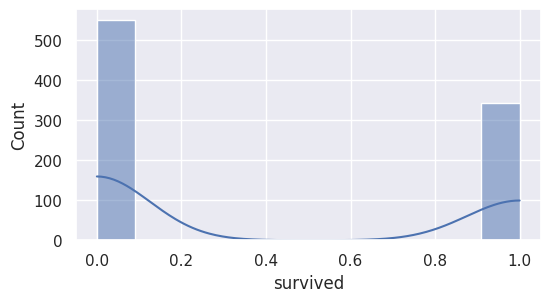


 pclass 



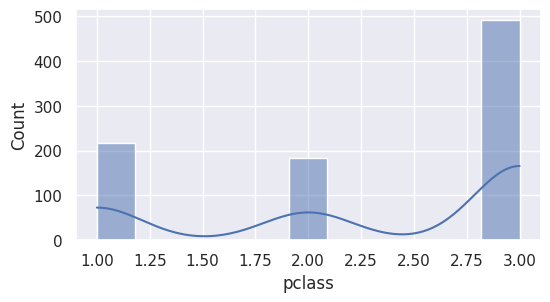


 age 



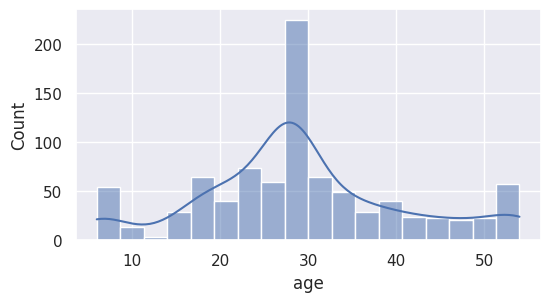


 sibsp 



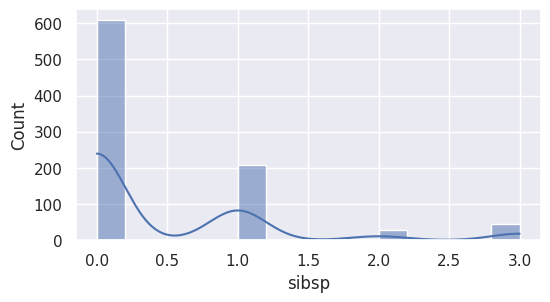


 parch 



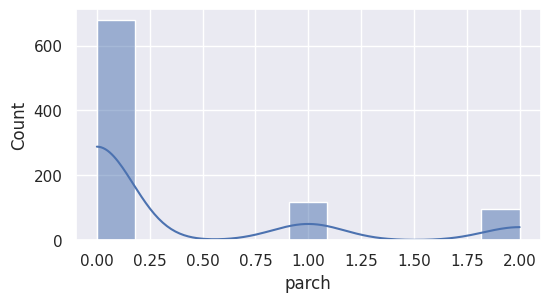


 fare 



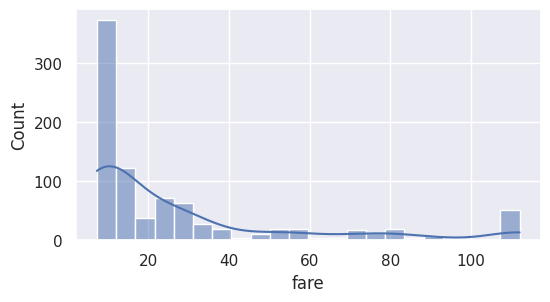


 is_adult 



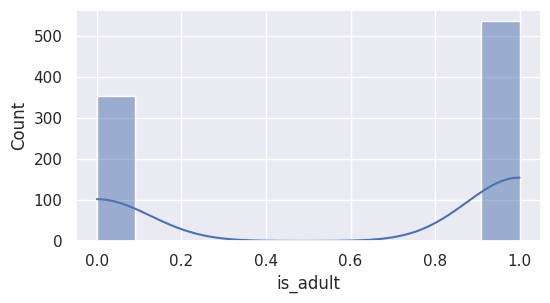


 is_alone 



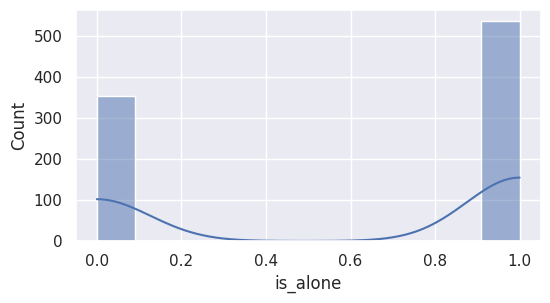


 deck_A 



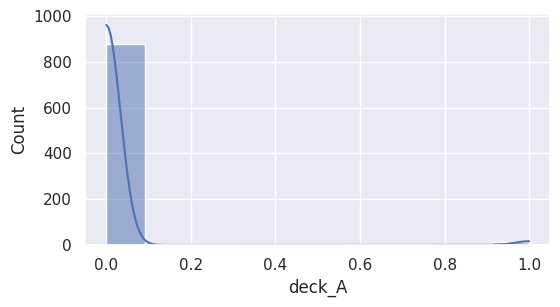


 deck_B 



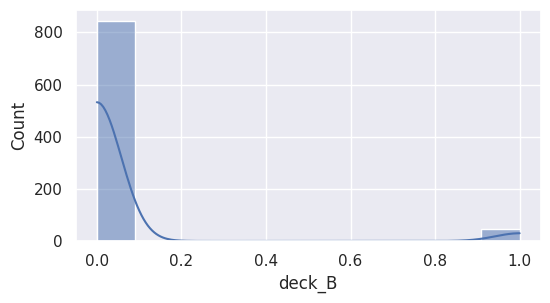


 deck_C 



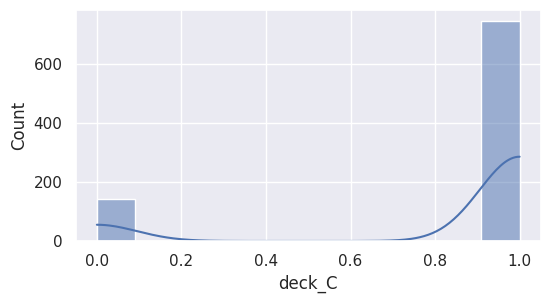


 deck_D 



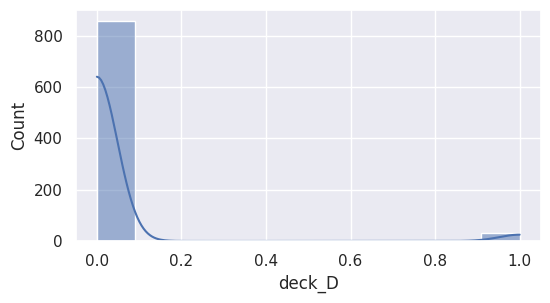


 deck_E 



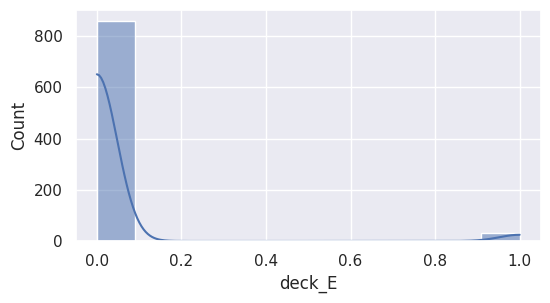


 deck_F 



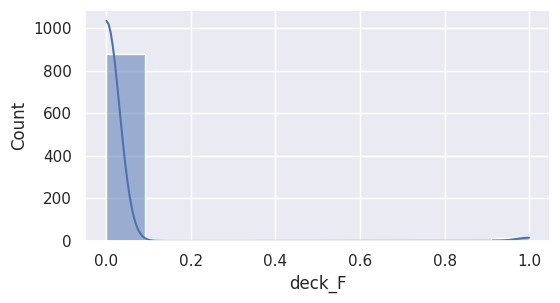


 deck_G 



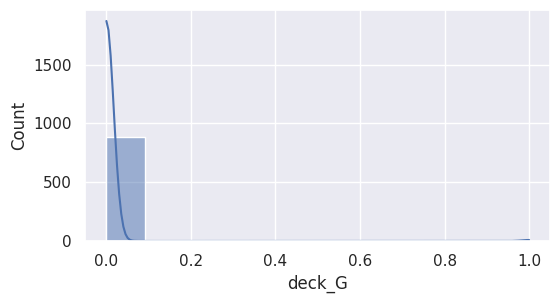


 embark_town_Cherbourg 



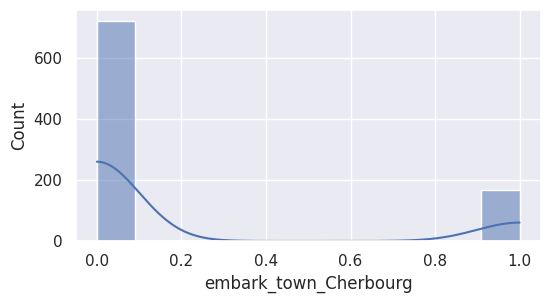


 embark_town_Queenstown 



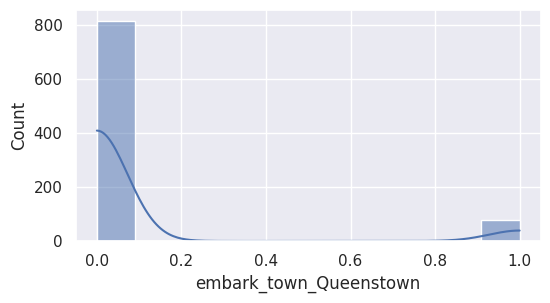


 embark_town_Southampton 



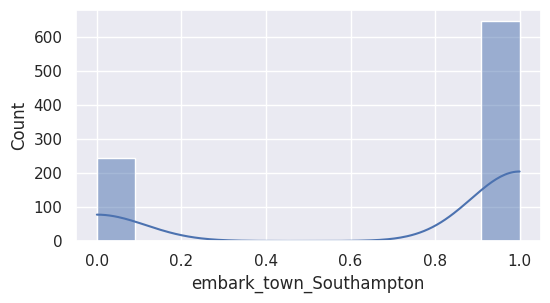


 embarked_C 



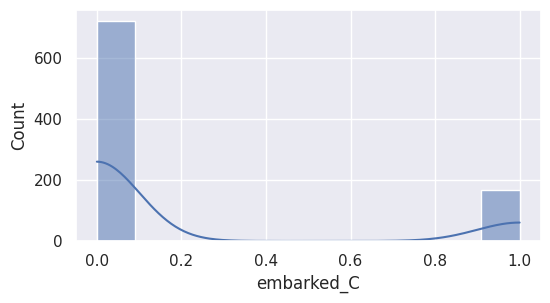


 embarked_Q 



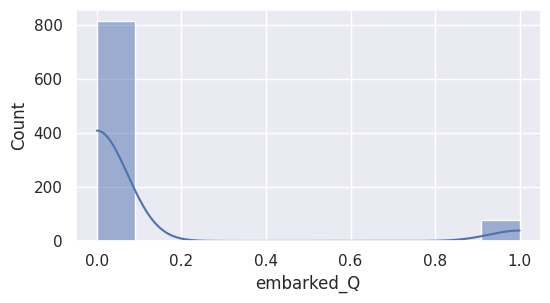


 embarked_S 



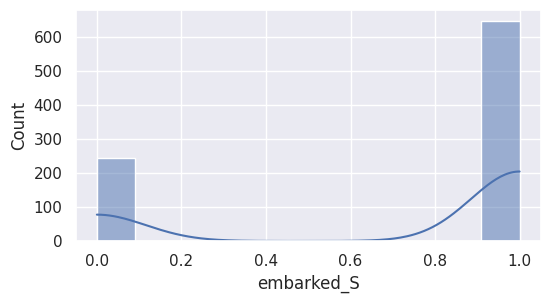


 is_male 



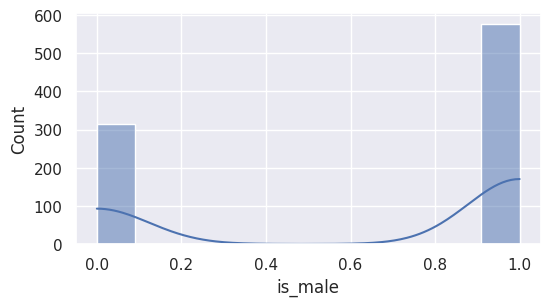


 who_child 



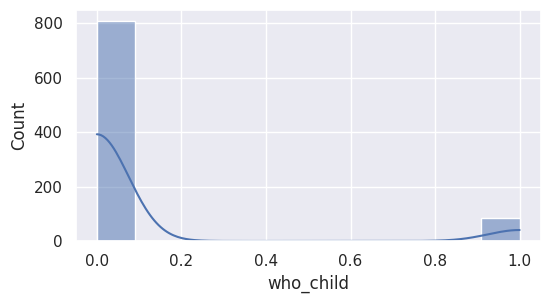


 who_man 



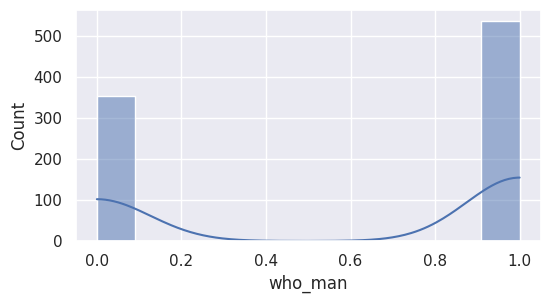


 who_woman 



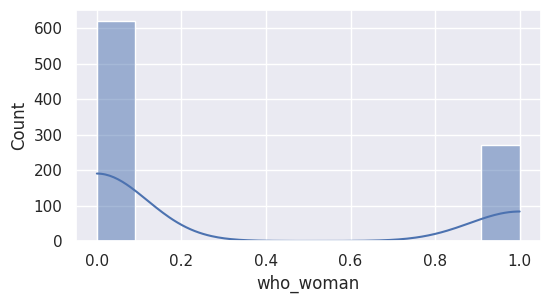

In [ ]:
for i in dt1_oh.columns:
  sns.set(style = 'darkgrid')
  print('\n', i, '\n')
  plt.figure(figsize = (6,3))
  plt.subplot(1,1,1)
  sns.histplot(data = dt1_oh, x = i, kde = True)
  plt.show()

In [ ]:
dt1_oh.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.000,0.0000,0.0000,1.0,1.00000
pclass,891.0,2.308642,0.836071,1.000,2.0000,3.0000,3.0,3.00000
age,891.0,29.157127,11.728914,6.000,22.0000,28.0000,35.0,54.00000
sibsp,891.0,0.452301,0.788059,0.000,0.0000,0.0000,1.0,3.00000
parch,891.0,0.345679,0.663266,0.000,0.0000,0.0000,0.0,2.00000
fare,891.0,27.857570,29.112872,7.225,7.9104,14.4542,31.0,112.07915
is_adult,891.0,0.602694,0.489615,0.000,0.0000,1.0000,1.0,1.00000
is_alone,891.0,0.602694,0.489615,0.000,0.0000,1.0000,1.0,1.00000
deck_A,891.0,0.016835,0.128725,0.000,0.0000,0.0000,0.0,1.00000
deck_B,891.0,0.052750,0.223659,0.000,0.0000,0.0000,0.0,1.00000


In [ ]:

# para redes neuronales
numerical_cols_to_scale = ['fare', 'parch', 'sibsp', 'age', 'pclass']
scaler = StandardScaler()
dt1_oh[numerical_cols_to_scale] = scaler.fit_transform(dt1_oh[numerical_cols_to_scale])

# MODEL 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)

In [ ]:
dt1_oh.shape

(891, 25)

In [ ]:
X.shape

(1098, 24)

In [ ]:
backend.clear_session()
np.random.seed(42)

import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, input_dim=24, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
#pip install --upgrade scikit-learn scikeras

# It's not used because we need to fit versions compatibles in scikit-leanr and scikeras

  Using cached scikeras-0.13.0-py3-none-any.whl.metadata (3.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 117.6 MB/s eta 0:00:00
Using cached scikeras-0.13.0-py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: scikeras
    Found existing installation: scikeras 0.12.0
    Uninstalling scikeras-0.12.0:
      Successfully uninstalled scikeras-0.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.1 requires keras<2.16,>=2.15.0, but you ha

In [ ]:
import sklearn
import scikeras
print("Versión de scikit-learn:", sklearn.__version__)
print("Versión de scikeras:", scikeras.__version__)

Versión de scikit-learn: 1.3.2
Versión de scikeras: 0.12.0


In [ ]:
keras_estimator = KerasClassifier(build_fn=build_model, optimizer="Adam", verbose=1)
# define the grid search parameters
learn_rate = [0.01, 0.1, 0.001]
batch_size = [32, 64, 128]
param_random = dict(optimizer__learning_rate=learn_rate, batch_size=batch_size)

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_distributions=param_random,n_jobs=-1)

In [ ]:
pip install tensorflow==2.15.1 scikit-learn==1.3.2 scikeras==0.12.0


  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached scikeras-0.12.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
Using cached scikeras-0.12.0-py3-none-any.whl (27 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.10.0
    Uninstalling keras-3.10.0:
      Successfully uninstalled keras-3.10.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: scikeras
    Found existing installation: scikeras 0.13.0
    Uninstalling scikeras-0.13.0:
      Successfully uninstalled scikeras-0.13.0
ERROR: pip's dependency resolver does not currently take into ac

In [ ]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
11/11 [==============================] - 1s 21ms/step - loss: 1.7402 - accuracy: 0.4701 - val_loss: 0.9052 - val_accuracy: 0.4432
Best: 0.665139 using {'optimizer__learning_rate': 0.1, 'batch_size': 64}


#### OBSERVATIONS:
Very low accuracy

##2. MODEL 2

In [ ]:
def build_model_mejorado(optimizer='adam', optimizer__learning_rate=0.001): # Add optimizer__learning_rate as a parameter
    model = Sequential()
    # Primera capa ocila
    model.add(Dense(128, input_dim=24, activation='relu'))
    # Batch Normalization: Ayuda a estabilizar las entradas a las capas, acelerando el entrenamiento y actuando como regularización.
    model.add(BatchNormalization())
    # Dropout: Apaga aleatoriamente un porcentaje de neuronas durante el entrenamiento para prevenir overfitting.
    model.add(Dropout(0.3))

    # Segunda capa oculta
    model.add(Dense(64, activation='relu'))
    # Batch Normalization
    model.add(BatchNormalization())
    # Dropout
    model.add(Dropout(0.3))

    # Tercera capa oculta (opcional, puedes agregar más capas)
    model.add(Dense(32, activation='relu'))
    # Batch Normalization
    model.add(BatchNormalization())
    # Dropout
    model.add(Dropout(0.3))

    # Capa de salida
    # Para clasificación binaria, una neurona con activación 'sigmoid' es lo correcto.
    model.add(Dense(1, activation='sigmoid'))

    # Compilación del modelo
    # Usamos el optimizador Adam, que suele ser una buena opción por defecto.
    # La tasa de aprendizaje la dejaremos que sea ajustada por RandomizedSearchCV.
    # 'binary_crossentropy' es la función de pérdida adecuada para clasificación binaria. [1]
    # 'accuracy' es una métrica importante para evaluar el rendimiento.
    optimizer_instance = tf.keras.optimizers.Adam(learning_rate=optimizer__learning_rate) # Use the parameter directly
    model.compile(optimizer=optimizer_instance, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
keras_estimator_mejorado = KerasClassifier(build_fn=build_model_mejorado, optimizer="Adam", verbose=1)

# define the grid search parameters
learn_rate = [0.01, 0.1, 0.001]
batch_size = [32, 64, 128]
param_random_mejorado = dict(optimizer__learning_rate=learn_rate, batch_size=batch_size)

kfold_splits = 3
random_mejorado = RandomizedSearchCV(estimator=keras_estimator_mejorado,
                                  verbose=1,
                                  cv=kfold_splits,
                                  param_distributions=param_random_mejorado,
                                  n_jobs=-1)

random_result_mejorado = random_mejorado.fit(X_train, y_train, validation_split=0.2, verbose=1)

# Summarize results
print("Best: %f using %s" % (random_result_mejorado.best_score_, random_result_mejorado.best_params_))
means_mejorado = random_result_mejorado.cv_results_['mean_test_score']
stds_mejorado = random_result_mejorado.cv_results_['std_test_score']
params_mejorado = random_result_mejorado.cv_results_['params']

# Opcional: Imprimir todos los resultados
# for mean, stdev, param in zip(means_mejorado, stds_mejorado, params_mejorado):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
22/22 [==============================] - 2s 19ms/step - loss: 0.8029 - accuracy: 0.5584 - val_loss: 0.6559 - val_accuracy: 0.6307
Best: 0.636682 using {'optimizer__learning_rate': 0.1, 'batch_size': 32}


In [ ]:
# Define the Keras model
model = Sequential([
    # First Dense layer: Specify input_shape here. No extra parentheses around arguments.
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    # Second Dense layer
    Dense(32, activation='relu'),
    # Output layer: For binary classification, 1 neuron with 'sigmoid' activation
    Dense(1, activation='sigmoid') # Assuming binary classification based on your data
])

# Compilar modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

# Definir early stopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Entrenar modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop])

# Evaluar
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy en test: {accuracy*100:.2f}%')

Epoch 1/100
28/28 [==============================] - 1s 13ms/step - loss: 0.0000e+00 - accuracy: 0.5011 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Accuracy en test: 50.00%


In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers


In [ ]:
def create_network():
    model = Sequential([
        # Set input_dim to the number of features in your X_train data
        Dense(100, activation='relu', input_dim=X_train.shape[1]),
        Dense(66, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def evaluate(model):
    model.summary()
    model.compile(optimizer=optimizers.SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=40, epochs=30, validation_split=.1,
                       callbacks=[callbacks.EarlyStopping(patience=5)])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD # Assuming you fix the SGD import as well


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 100)               2500      
                                                                 
 dense_27 (Dense)            (None, 66)                6666      
                                                                 
 dense_28 (Dense)            (None, 1)                 67        
                                                                 
Total params: 9233 (36.07 KB)
Trainable params: 9233 (36.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/30
20/20 [==============================] - 1s 14ms/step - loss: 1.1753 - accuracy: 0.5684 - val_loss: 0.9324 - val_accuracy: 0.5682
Epoch 2/30
20/20 [==============================] - 0s 7ms/step - loss: 0.7164 - accuracy: 0.6354 - val_loss: 1.1055 - val_accuracy: 0.4545
Epoch 3/30
20/20 [==============================] - 0s 9ms/step - loss: 0.6446 - accuracy: 0.6443 - val_loss: 0.6486 - val_accuracy: 0.6818
Epoch 4/30
20/20 [==============================] - 0s 9ms/step - loss: 0.6540 - accuracy: 0.6658 - val_loss: 0.7228 - val_accuracy: 0.5114
Epoch 5/30
20/20 [==============================] - 0s 6ms/step - loss: 0.6198 - accuracy: 0.6747 - val_loss: 0.6705 - val_accuracy: 0.6818
Epoch 6/30
20/20 [==============================] - 0s 5ms/step - loss: 0.5909 - accuracy: 0.6937 - val_loss: 0.7481 - val_accuracy: 0.6477
Epoch 7/30
20/20 [==============================] - 0s 7ms/step - loss: 0.5909 - accuracy: 0.6899 - val_loss: 0.6994 - val_accuracy: 0.6932
Epoch 8/30
20/20 [=

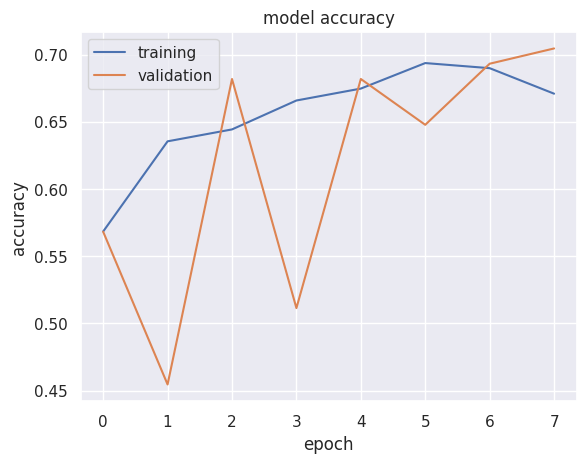

In [ ]:
model = create_network()
evaluate(model)

## 3. MODEL

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6400      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 49665 (194.00 KB)
Trainable params: 49665 (194.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
11/11 [==============================] - 1s 21ms/step - loss: 1.7088 - accuracy: 0.5185 - val_loss: 1.3039 - val_accuracy: 0.6080
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 0.9424 - accuracy: 0.6040 - val_loss: 0.7032 - val_accuracy: 0.6705
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 0.7479 - accuracy: 0.6581 - val_loss: 0.6429 - val_accuracy: 0.6250
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 0.5915 - accuracy: 0.7436 - val_loss: 0.5660 - val_accuracy: 0.6875
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 0.5719 - accuracy: 0.7179 - val_loss: 0.5312 - val_accuracy: 0.7216
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 0.5319 - accuracy: 0.7550 - val_loss: 0.6146 - val_accuracy: 0.7330
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 0.4998 - accuracy: 0.7806 - val_loss: 0.5294 - val_accuracy: 0.7045
Epoch 8/50
11/11 [=

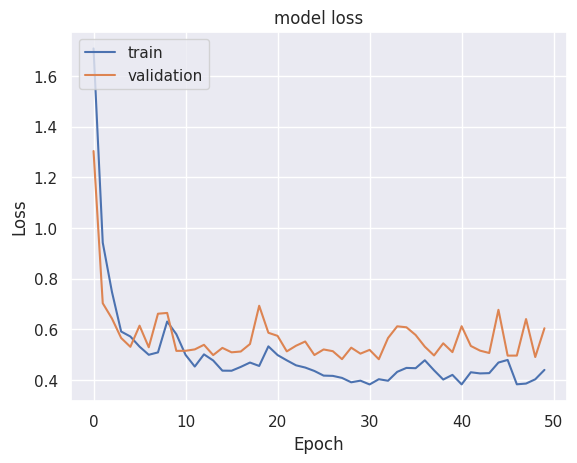

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

7/7 [==============================] - 0s 3ms/step
Best Threshold=0.670495, G-Mean=0.777


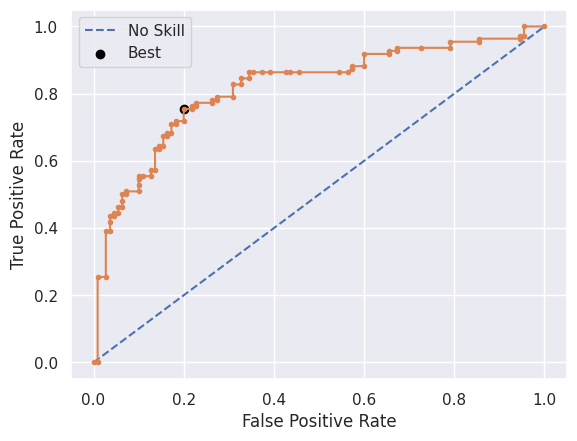

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

7/7 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

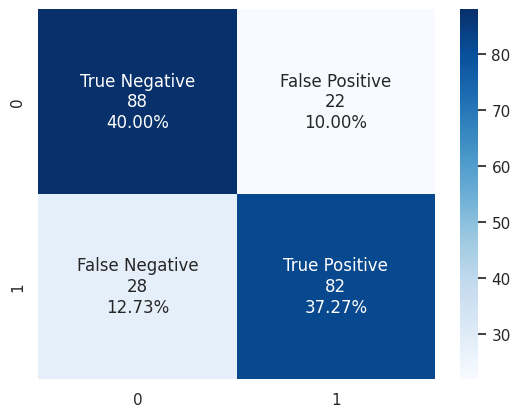

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm1,
                      group_names=labels,
                      cmap='Blues')

#### Observation:
##### Optimizer:
1. *Adam*: Used for binary or multiclass
2. *SGD* : Used for preccision and tf.control_dependencies

#### Metrics:
1. *Accuracy*: Correct predictions
2. *Precision*:
3. *Recall*
4. *AUC* : Area under curve

### 4. Modelo

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


num_features = X_train.shape[1]

model = Sequential([
    Dense(64, activation="relu", input_shape=(num_features,)),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Early stopping para evitar overfitting
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Entrenamiento TRAIN
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop])


y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


Epoch 1/100
22/22 [==============================] - 1s 10ms/step - loss: 1.2840 - accuracy: 0.5399 - val_loss: 0.7316 - val_accuracy: 0.6307
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.9419 - accuracy: 0.5869 - val_loss: 0.6801 - val_accuracy: 0.6307
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.8594 - accuracy: 0.5855 - val_loss: 0.6516 - val_accuracy: 0.6591
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 0.7500 - accuracy: 0.6439 - val_loss: 0.6407 - val_accuracy: 0.6420
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7174 - accuracy: 0.6026 - val_loss: 0.6322 - val_accuracy: 0.6420
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7416 - accuracy: 0.6054 - val_loss: 0.6367 - val_accuracy: 0.6364
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7059 - accuracy: 0.6040 - val_loss: 0.6311 - val_accuracy: 0.6364
Epoch 8/100


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                1600      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4225 (16.50 KB)
Trainable params: 4225 (

7/7 [==============================] - 0s 2ms/step
Best Threshold=0.521479, G-Mean=0.818


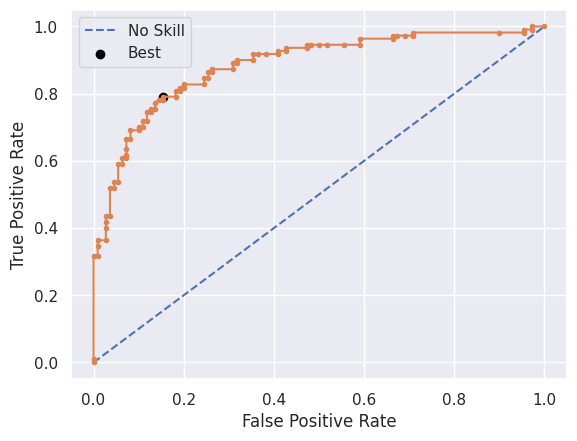

In [ ]:
yhat1 = model.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

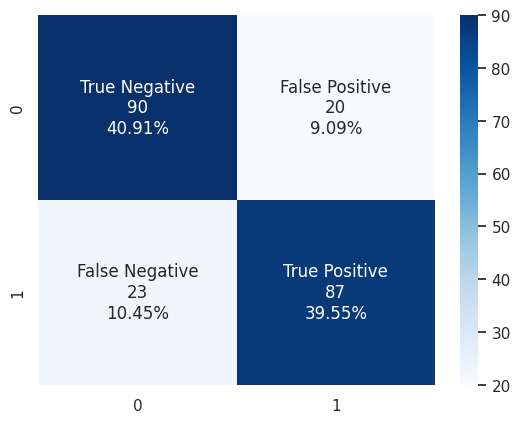

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm1,
                      group_names=labels,
                      cmap='Blues')

#Observations:
Use _dropout_ for _0.3_ and ReLU. For binary classifcations use sigmoid for True or False survives. Use Adam for neuronal networks simples. Early stop for Overfitting